In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r"C:\Users\verma\OneDrive\Desktop\adult 3.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
df.isna().sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.duplicated().sum()


np.int64(52)

In [8]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [9]:
df.age.value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

In [10]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [11]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [12]:
df["marital-status"].value_counts()

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [13]:
df.replace({"?":"Others"}, inplace=True)

In [16]:
df['workclass'] = df['workclass'].replace({"Others": "NotListed", "?": "NotListed"})

In [17]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NotListed,103497,Some-college,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K


In [18]:
df = df[df["workclass"] != "Without-pay"]
df = df[df["workclass"] != "Never-worked"]

In [19]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NotListed            2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64

In [20]:
df.income.value_counts()

income
<=50K    37126
>50K     11685
Name: count, dtype: int64

In [21]:
df.education.value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [22]:
df = df[df["education"] != "Preschool"]
df = df[df["education"] != "1st-4th"]
df = df[df["education"] != "5th-6th"]

In [23]:
df.education.value_counts()

education
HS-grad         15768
Some-college    10873
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1809
Assoc-acdm       1599
10th             1387
7th-8th           952
Prof-school       834
9th               756
12th              657
Doctorate         594
Name: count, dtype: int64

In [24]:
df.drop(columns=["education"], inplace=True)
df.drop(columns=["fnlwgt"], inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x21b0f26dd10>,
 'caps': [<matplotlib.lines.Line2D at 0x21b0f26df90>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b0f1d9a90>],
 'medians': [<matplotlib.lines.Line2D at 0x21b0f26e210>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b0f26e350>],
 'means': []}

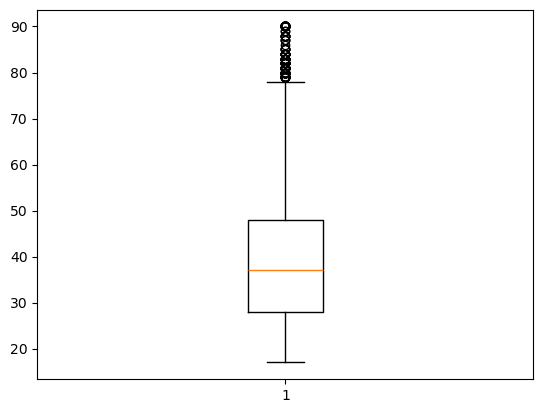

In [25]:
plt.boxplot(df.age) # can see what are the outliers

In [26]:
df = df[(df["age"]<=75) & (df["age"]>=17)]

{'whiskers': [<matplotlib.lines.Line2D at 0x21b0febbd90>,
 'caps': [<matplotlib.lines.Line2D at 0x21b0fee4050>,
 'boxes': [<matplotlib.lines.Line2D at 0x21b0febbc50>],
 'medians': [<matplotlib.lines.Line2D at 0x21b0fee42d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21b0fee4410>],
 'means': []}

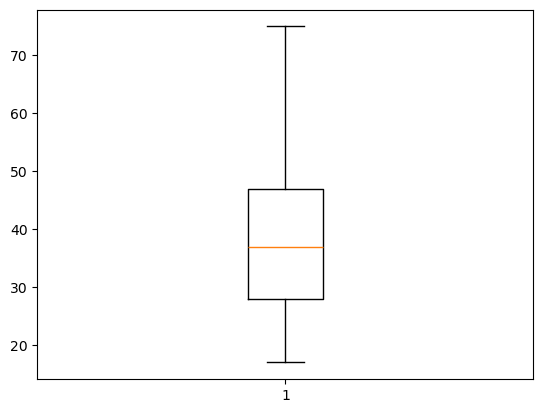

In [27]:
plt.boxplot(df.age)

In [28]:
encoder = LabelEncoder()
df["workclass"] = encoder.fit_transform(df["workclass"])
df["marital-status"] = encoder.fit_transform(df["marital-status"])
df["occupation"] = encoder.fit_transform(df["occupation"])
df["relationship"] = encoder.fit_transform(df["relationship"])
df["race"] = encoder.fit_transform(df["race"])
df["gender"] = encoder.fit_transform(df["gender"])
df["capital-gain"] = encoder.fit_transform(df["capital-gain"])
df["native-country"] = encoder.fit_transform(df["native-country"])

In [29]:
df1 = df
X = df.drop(columns = ["income"])
Y = df["income"]
df.columns

Index(['age', 'workclass', 'educational-num', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [30]:
MinMax = MinMaxScaler()
X = MinMax.fit_transform(X)

In [32]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.2, random_state=46, stratify=Y)

In [33]:
Xtest

array([[0.01724138, 0.5       , 0.25      , ..., 0.        , 0.23469388,
        0.95121951],
       [0.32758621, 0.5       , 0.66666667, ..., 0.        , 0.60204082,
        0.95121951],
       [0.20689655, 0.5       , 0.58333333, ..., 0.45316804, 0.39795918,
        0.95121951],
       ...,
       [0.20689655, 0.33333333, 0.5       , ..., 0.        , 0.13265306,
        0.95121951],
       [0.43103448, 0.5       , 0.66666667, ..., 0.        , 0.39795918,
        0.95121951],
       [0.9137931 , 0.5       , 0.16666667, ..., 0.        , 0.19387755,
        0.95121951]])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(Xtrain, Ytrain)
predict = KNN.predict(Xtest)

In [35]:
report = classification_report(Ytest, predict, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
<=50K,0.881801,0.899667,0.890644,7206.000000
>50K,0.667127,0.625108,0.645434,2318.000000
accuracy,0.832843,0.832843,0.832843,0.832843
macro avg,0.774464,0.762387,0.768039,9524.000000
weighted avg,0.829552,0.832843,0.830964,9524.000000


<Axes: >

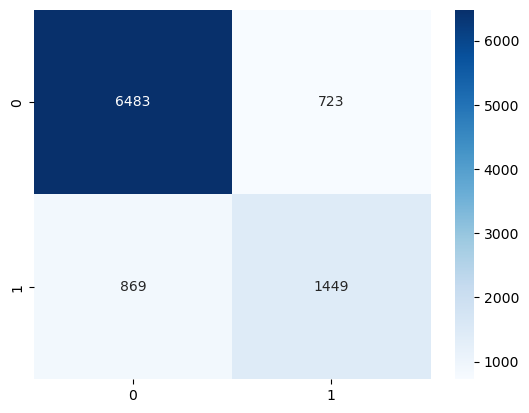

In [36]:
cm = confusion_matrix(Ytest, predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [37]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(Xtrain, Ytrain)
predict2 = LogReg.predict(Xtest)
report = classification_report(Ytest, predict2, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
<=50K,0.843228,0.938246,0.888203,7206.000000
>50K,0.704515,0.457722,0.554916,2318.000000
accuracy,0.821294,0.821294,0.821294,0.821294
macro avg,0.773872,0.697984,0.721560,9524.000000
weighted avg,0.809467,0.821294,0.807086,9524.000000


<Axes: >

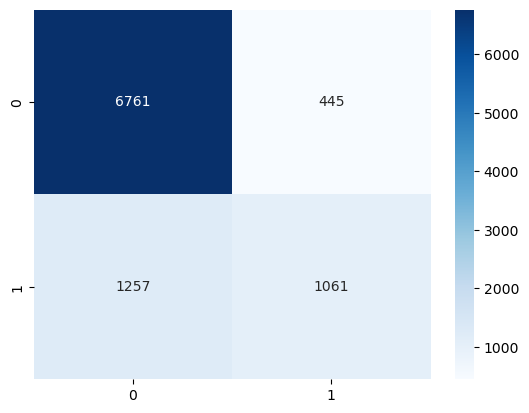

In [38]:
cm = confusion_matrix(Ytest, predict2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [39]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(Xtrain, Ytrain)
predict3 = SVM.predict(Xtest)

<Axes: >

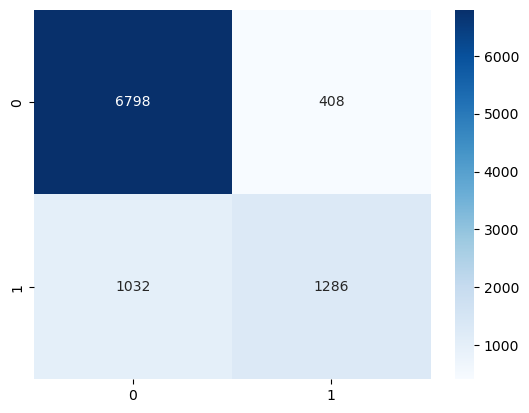

In [40]:
cm = confusion_matrix(Ytest, predict3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [41]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver="adam", hidden_layer_sizes=(24,15), random_state=2, max_iter=10000)
clf.fit(Xtrain,Ytrain)
predict4 = clf.predict(Xtest)
accuracy_score(predict4, Ytest)

0.8513229735405292

In [42]:
report = classification_report(Ytest, predict3, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
<=50K,0.868199,0.943381,0.904230,7206.000000
>50K,0.759150,0.554789,0.641077,2318.000000
accuracy,0.848803,0.848803,0.848803,0.848803
macro avg,0.813675,0.749085,0.772653,9524.000000
weighted avg,0.841658,0.848803,0.840182,9524.000000


<Axes: >

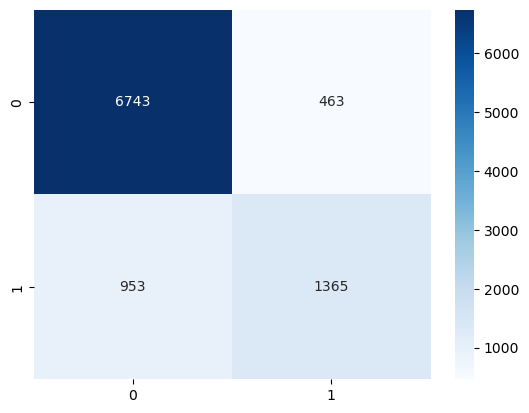

In [43]:
cm = confusion_matrix(Ytest, predict4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [44]:
report = classification_report(Ytest, predict4, output_dict = True)
pd.DataFrame(report).transpose()

,precision,recall,f1-score,support
<=50K,0.876169,0.935748,0.904979,7206.000000
>50K,0.746718,0.588870,0.658466,2318.000000
accuracy,0.851323,0.851323,0.851323,0.851323
macro avg,0.811444,0.762309,0.781723,9524.000000
weighted avg,0.844663,0.851323,0.844982,9524.000000



=== Logistic ===
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      7206
        >50K       0.70      0.46      0.55      2318

    accuracy                           0.82      9524
   macro avg       0.77      0.70      0.72      9524
weighted avg       0.81      0.82      0.81      9524



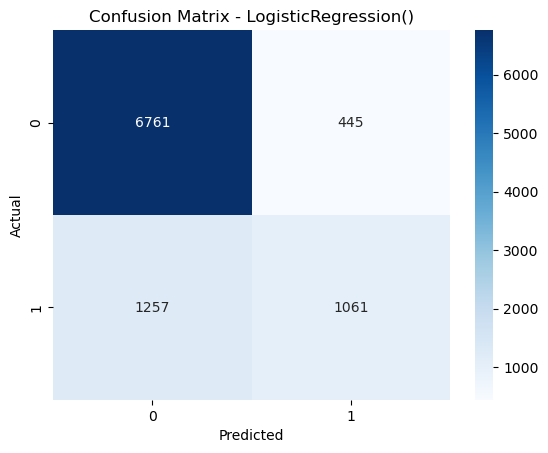


=== KNN ===
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      7206
        >50K       0.67      0.63      0.65      2318

    accuracy                           0.83      9524
   macro avg       0.77      0.76      0.77      9524
weighted avg       0.83      0.83      0.83      9524



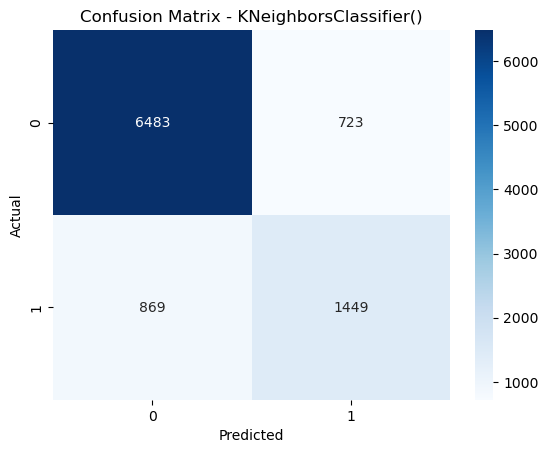


=== SVM ===
              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      7206
        >50K       0.76      0.55      0.64      2318

    accuracy                           0.85      9524
   macro avg       0.81      0.75      0.77      9524
weighted avg       0.84      0.85      0.84      9524



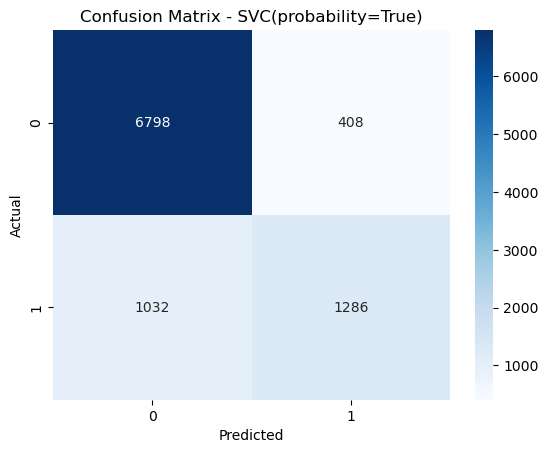

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

models1 = {
    'Logistic': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}
results = {}
for name, model in models1.items():
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', model)
    ])

    pipe.fit(Xtrain, Ytrain)
    preds = pipe.predict(Xtest)
    
    print(f"\n=== {name} ===")
    print(classification_report(Ytest, preds))
    report = classification_report(Ytest, preds, output_dict=True)
    metrics = report["weighted avg"]
    
    
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": metrics["precision"],
        "Recall": metrics["recall"],
        "F1-score": metrics["f1-score"]
    }

    df_results = pd.DataFrame(results).T  
    df_results = df_results.round(3)

    cm = confusion_matrix(Ytest, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [46]:
def build_basic_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
def build_deep_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(X.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [53]:
!pip install scikeras

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 12.7 MB/s eta 0:00:00

   ------------- -------------------------- 2/6 [ml-dtypes]
   -------------------- ------------------- 3/6 [absl-py]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   -------------------------- ------------- 4/6 [keras]
   ----

In [4]:
!python --version

Python 3.13.5


In [25]:
df1 = pd.read_csv("C:/Users/verma/OneDrive/Desktop/adult 3.csv")

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import joblib

# Assuming df1 is already loaded — if not, load it like this:
# df1 = pd.read_csv("your_dataset.csv")

# Target and features
target = 'income'
numerical_features = ['age', 'educational-num', 'hours-per-week']
categorical_features = [
    'workclass', 'marital-status', 'occupation', 'relationship',
    'race', 'gender', 'native-country'
]

# Create features (X) and labels (y)
X = df1[numerical_features + categorical_features]
y = df1[target]

# Train/test split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# CLASSIFIER CHOICE: Use LogisticRegression or LinearSVC
# classifier = LogisticRegression(max_iter=500)
classifier = LinearSVC(max_iter=500)

# Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Train model
pipeline.fit(Xtrain, Ytrain)

# Save to disk
joblib.dump(pipeline, 'best_model.pkl')
print("✅ Model trained and saved as 'best_model.pkl'")


✅ Model trained and saved as 'best_model.pkl'


In [28]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load trained pipeline
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Classifying Employee Salary", page_icon="🏢", layout="centered")

st.title("💼 Employee Salary Classification by Devansh verma")
st.markdown("Predicting if an Employee salary is >50K or <=50K based on the given input")

# Sidebar inputs
st.sidebar.header("Input Employee Details")

age = st.sidebar.slider("Age", 18, 65, 30)
edu_num = st.sidebar.slider("Education Number (e.g., 9 = HS-grad, 13 = Bachelors)", 1, 16, 10)
workclass = st.sidebar.selectbox("Workclass", [
    "Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov",
    "Local-gov", "State-gov", "Without-pay", "Never-worked", "Other"
])
marital_status = st.sidebar.selectbox("Marital Status", [
    "Never-married", "Married-civ-spouse", "Divorced", "Separated", "Widowed", "Married-spouse-absent"
])
occupation = st.sidebar.selectbox("Occupation", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
    ])
relationship = st.sidebar.selectbox("Relationship", [
    "Wife", "Own-child", "Husband", "Not-in-family", "Other-relative", "Unmarried"
])
race = st.sidebar.selectbox("Race", ["White", "Black", "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"])
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
native_country = st.sidebar.selectbox("Native Country", ["United-States", "Mexico", "Philippines", "Germany", "Canada", "India", "Other"])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
# Input DataFrame (matches model pipeline columns)
input_df = pd.DataFrame({
    'age': [age],
    'educational-num': [edu_num],
    'workclass': [workclass],
    'marital-status': [marital_status],
    'occupation': [occupation],
    'relationship': [relationship],
    'race': [race],
    'gender': [gender],
    'native-country': [native_country],
    'hours-per-week': [hours_per_week]
})

st.write("### 🔎 Input Data")
st.write(input_df)

if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")
    # Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Writing app.py
